In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 日本語フォントの設定 macOSの場合
plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['axes.unicode_minus'] = False

# 警告を無視
import warnings
warnings.filterwarnings('ignore')

### 外交的・内向的,SNS利用時間

In [28]:
# データ作成
data = { #データの変数、内容を定義
    '性格': ['外交的']*22 + ['内向的']*31, # 外交的と内向的、22人と31人
    'SNS利用時間': [8,6,4,2,6,6,4,4,2,2,4,4,2,8,6,4,6,4,4,4,2,2,8,6,0,6,2,0,0,8,6,6,4,4,4,0,0,4,4,2,4,8,8,6,2,6,6,2,4,2,8,6,8]
}
df = pd.DataFrame(data) # pandasのDataFrameに変換

# データの表示
print(df) # 中身確認
print("\nデータの形状:", df.shape) # 改行しながらデータを表示

     性格  SNS利用時間
0   外交的        8
1   外交的        6
2   外交的        4
3   外交的        2
4   外交的        6
5   外交的        6
6   外交的        4
7   外交的        4
8   外交的        2
9   外交的        2
10  外交的        4
11  外交的        4
12  外交的        2
13  外交的        8
14  外交的        6
15  外交的        4
16  外交的        6
17  外交的        4
18  外交的        4
19  外交的        4
20  外交的        2
21  外交的        2
22  内向的        8
23  内向的        6
24  内向的        0
25  内向的        6
26  内向的        2
27  内向的        0
28  内向的        0
29  内向的        8
30  内向的        6
31  内向的        6
32  内向的        4
33  内向的        4
34  内向的        4
35  内向的        0
36  内向的        0
37  内向的        4
38  内向的        4
39  内向的        2
40  内向的        4
41  内向的        8
42  内向的        8
43  内向的        6
44  内向的        2
45  内向的        6
46  内向的        6
47  内向的        2
48  内向的        4
49  内向的        2
50  内向的        8
51  内向的        6
52  内向的        8

データの形状: (53, 2)


In [29]:
df.describe() # データの統計量を表示

,SNS利用時間
count,53.000000
mean,4.301887
std,2.398597
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,8.000000


<Figure size 300x200 with 0 Axes>

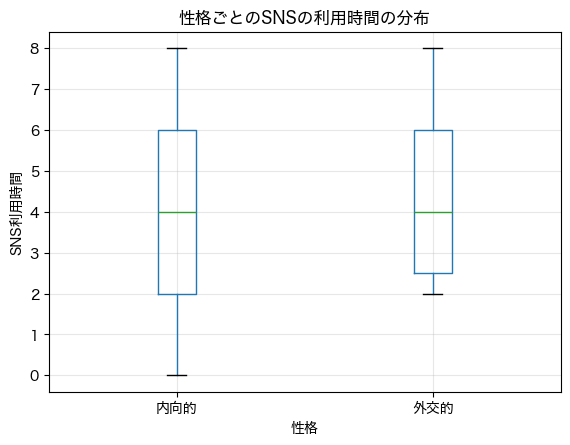

In [30]:
# データの可視化
plt.figure(figsize=(3, 2))

# 箱ひげ図
df.boxplot(column='SNS利用時間', by='性格') # column→縦軸、by→何に変えるか
plt.title('性格ごとのSNSの利用時間の分布')
plt.suptitle('')  # デフォルトのタイトルを削除
plt.ylabel('SNS利用時間')
plt.grid(True, alpha=0.3)
plt.show()

In [31]:
# Mann-Whitney U検定
twenty_scores = df[df['性格']=='外交的']['SNS利用時間']
forty_scores = df[df['性格']=='内向的']['SNS利用時間']

stat, p_value = stats.mannwhitneyu(twenty_scores, forty_scores, alternative='two-sided')
print(f"Mann-Whitney U検定の結果:")
print(f"U統計量: {stat}")
print(f"p値: {p_value:.4f}")
print(f"\n結果の解釈:")
if p_value < 0.05:
    print("p < 0.05: 外交的，内向的でSNS利用時間に統計的に有意な差があります．")
else:
    print("p >= 0.05: 外交的，内向的でSNS利用時間に統計的に有意な差はありません．")

# p値だけレポートに載せるで大丈夫
# サンプル数が多いと有意なさが出やすい

Mann-Whitney U検定の結果:
U統計量: 327.5
p値: 0.8092

結果の解釈:
p >= 0.05: 外交的，内向的でSNS利用時間に統計的に有意な差はありません．


### 付き合っているかどうか,SNS利用時間

In [20]:
# データ作成
data = { #データの変数、内容を定義
    '交際しているかどうか': ['はい']*14 + ['いいえ']*39, # 外交的と内向的、22人と31人
    'SNS利用時間': [6,4,4,2,2,4,4,2,8,6,4,6,4,4,4,2,2,2,0,0,8,6,6,4,4,4,0,0,4,4,2,4,6,6,2,4,2,8,6,8,6,4,2,6,8,6,0,6,8,8,6,2,8]
}
df = pd.DataFrame(data) # pandasのDataFrameに変換

# データの表示
print(df) # 中身確認
print("\nデータの形状:", df.shape) # 改行しながらデータを表示

   交際しているかどうか  SNS利用時間
0          はい        6
1          はい        4
2          はい        4
3          はい        2
4          はい        2
5          はい        4
6          はい        4
7          はい        2
8          はい        8
9          はい        6
10         はい        4
11         はい        6
12         はい        4
13         はい        4
14        いいえ        4
15        いいえ        2
16        いいえ        2
17        いいえ        2
18        いいえ        0
19        いいえ        0
20        いいえ        8
21        いいえ        6
22        いいえ        6
23        いいえ        4
24        いいえ        4
25        いいえ        4
26        いいえ        0
27        いいえ        0
28        いいえ        4
29        いいえ        4
30        いいえ        2
31        いいえ        4
32        いいえ        6
33        いいえ        6
34        いいえ        2
35        いいえ        4
36        いいえ        2
37        いいえ        8
38        いいえ        6
39        いいえ        8
40        いいえ        6
41        いいえ        4
42        い

In [11]:
df.describe()

,SNS利用時間
count,53.000000
mean,4.301887
std,2.398597
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,8.000000


<Figure size 300x200 with 0 Axes>

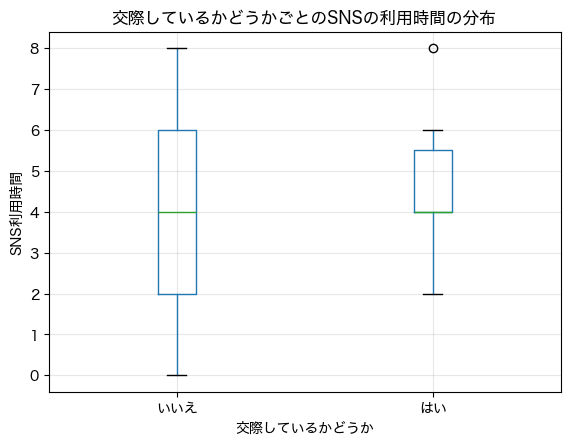

In [23]:
# データの可視化
plt.figure(figsize=(3, 2))

# 箱ひげ図
df.boxplot(column='SNS利用時間', by='交際しているかどうか') # column→縦軸、by→何に変えるか
plt.title('交際しているかどうかごとのSNSの利用時間の分布')
plt.suptitle('')  # デフォルトのタイトルを削除
plt.ylabel('SNS利用時間')
plt.grid(True, alpha=0.3)
plt.show()

In [25]:
# Mann-Whitney U検定
twenty_scores = df[df['交際しているかどうか']=='はい']['SNS利用時間']
forty_scores = df[df['交際しているかどうか']=='いいえ']['SNS利用時間']

stat, p_value = stats.mannwhitneyu(twenty_scores, forty_scores, alternative='two-sided')
print(f"Mann-Whitney U検定の結果:")
print(f"U統計量: {stat}")
print(f"p値: {p_value:.4f}")
print(f"\n結果の解釈:")
if p_value < 0.05:
    print("p < 0.05: 交際しているかどうかでSNS利用時間に統計的に有意な差があります．")
else:
    print("p >= 0.05: 交際しているかどうかでSNS利用時間に統計的に有意な差はありません．")

# p値だけレポートに載せるで大丈夫
# サンプル数が多いと有意なさが出やすい

Mann-Whitney U検定の結果:
U統計量: 266.0
p値: 0.8927

結果の解釈:
p >= 0.05: 交際しているかどうかでSNS利用時間に統計的に有意な差はありません．


### リッカート尺度,性別

In [14]:
# データ作成
data = { #データの変数、内容を定義
    '性別': ['男性']*37 + ['女性']*16, # 外交的と内向的、22人と31人
    'SNS利用時間': [6,4,4,2,2,4,4,2,8,6,4,6,4,2,0,0,8,6,6,4,4,4,0,0,4,4,2,4,8,6,4,2,6,8,6,0,6,4,4,2,2,6,6,2,4,2,8,6,8,8,6,2,8]
}
df = pd.DataFrame(data) # pandasのDataFrameに変換

# データの表示
print(df) # 中身確認
print("\nデータの形状:", df.shape) # 改行しながらデータを表示

    性別  SNS利用時間
0   男性        6
1   男性        4
2   男性        4
3   男性        2
4   男性        2
5   男性        4
6   男性        4
7   男性        2
8   男性        8
9   男性        6
10  男性        4
11  男性        6
12  男性        4
13  男性        2
14  男性        0
15  男性        0
16  男性        8
17  男性        6
18  男性        6
19  男性        4
20  男性        4
21  男性        4
22  男性        0
23  男性        0
24  男性        4
25  男性        4
26  男性        2
27  男性        4
28  男性        8
29  男性        6
30  男性        4
31  男性        2
32  男性        6
33  男性        8
34  男性        6
35  男性        0
36  男性        6
37  女性        4
38  女性        4
39  女性        2
40  女性        2
41  女性        6
42  女性        6
43  女性        2
44  女性        4
45  女性        2
46  女性        8
47  女性        6
48  女性        8
49  女性        8
50  女性        6
51  女性        2
52  女性        8

データの形状: (53, 2)


In [15]:
df.describe()

,SNS利用時間
count,53.000000
mean,4.301887
std,2.398597
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,8.000000


<Figure size 300x200 with 0 Axes>

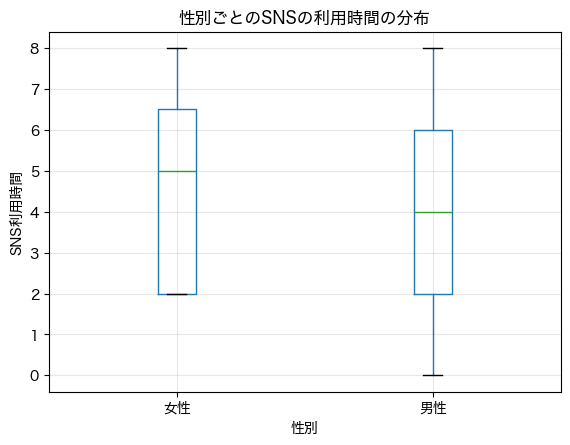

In [16]:
# データの可視化
plt.figure(figsize=(3, 2))

# 箱ひげ図
df.boxplot(column='SNS利用時間', by='性別') # column→縦軸、by→何に変えるか
plt.title('性別ごとのSNSの利用時間の分布')
plt.suptitle('')  # デフォルトのタイトルを削除
plt.ylabel('SNS利用時間')
plt.grid(True, alpha=0.3)
plt.show()

In [17]:
# Mann-Whitney U検定
twenty_scores = df[df['性別']=='男性']['SNS利用時間']
forty_scores = df[df['性別']=='女性']['SNS利用時間']

stat, p_value = stats.mannwhitneyu(twenty_scores, forty_scores, alternative='two-sided')
print(f"Mann-Whitney U検定の結果:")
print(f"U統計量: {stat}")
print(f"p値: {p_value:.4f}")
print(f"\n結果の解釈:")
if p_value < 0.05:
    print("p < 0.05: 性別でSNS利用時間に統計的に有意な差があります。")
else:
    print("p >= 0.05: 性別でSNS利用時間に統計的に有意な差はありません。")

# p値だけレポートに載せるで大丈夫
# サンプル数が多いと有意なさが出やすい

Mann-Whitney U検定の結果:
U統計量: 245.5
p値: 0.3190

結果の解釈:
p >= 0.05: 性別でSNS利用時間に統計的に有意な差はありません。
